In [1]:

# import required modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
import os
import cv2

In [2]:
Model = load_model('cat_dog.h5')

In [3]:
def read_image(data,filepath):
    path = os.path.join(filepath)
    images = os.listdir(path)
    for a in images:
        try:
            image = cv2.imread(path + '/'+ a)
            data.append(image)
        except Exception as e:
            print(e)

In [4]:
# load the data
original ='''original/'''
attacked = '''attacked/'''

original_data = []
attacked_data = []

read_image(original_data,original)
read_image(attacked_data,attacked)



In [5]:
def preprocess_img(data):
    X = []
    for i in data:
        image = cv2.resize(i,(250,250),interpolation = cv2.INTER_AREA)
        X.append(image)
    X = np.array(X)
    return X

In [6]:
preprocessed_original_data = preprocess_img(original_data)
preprocessed_attacked_data = preprocess_img(attacked_data)

In [7]:
print(preprocessed_original_data.shape)

(556, 250, 250, 3)


In [8]:
img_rows, img_cols, channels = 250, 250, 3

# preprocessed_original_data = preprocessed_original_data 
# preprocessed_attacked_data = preprocessed_attacked_data 

In [9]:
preprocessed_original_data.shape

(556, 250, 250, 3)

In [10]:
labels = ['cat','dog']

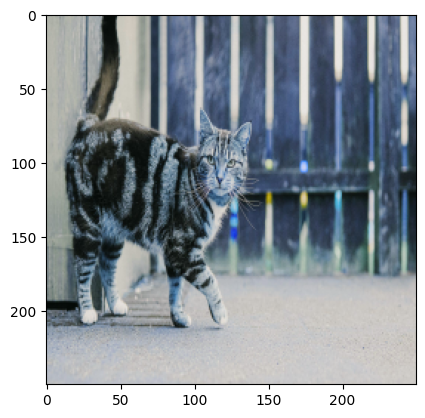

In [11]:
plt.imshow(preprocessed_original_data[0])

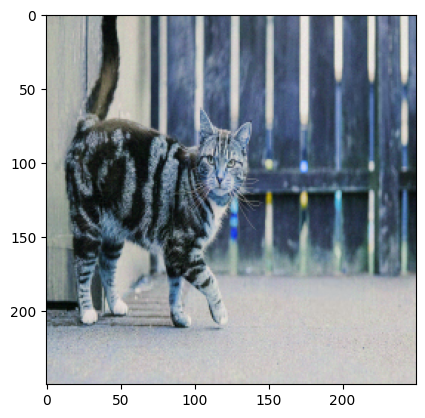

In [12]:
plt.imshow(preprocessed_attacked_data[0])

In [13]:
print(labels[(Model.predict(preprocessed_original_data[1].reshape(1,250,250,3))).argmax()])
print(labels[(Model.predict(preprocessed_attacked_data[1].reshape(1,250,250,3))).argmax()])


1/1 [==============================] - 0s 359ms/step
cat
1/1 [==============================] - 0s 32ms/step
dog


In [14]:
def cnn_denoiser():
    model = tf.keras.Sequential()
    #block -1 
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', input_shape=(250, 250, 3), name='conv1'))
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', input_shape=(250, 250, 3), name='conv2'))
    
    #batch normalization
    model.add(BatchNormalization(name='bn1'))
    model.add(Activation('relu'))
    
    #block -2
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv3'))
    model.add(BatchNormalization(name='bn2'))
    model.add(Activation('relu'))
    
    #block -3 to -7 repeat block -2
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv4'))
    model.add(BatchNormalization(name='bn3'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv5'))
    model.add(BatchNormalization(name='bn4'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv6'))
    model.add(BatchNormalization(name='bn5'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv7'))
    model.add(BatchNormalization(name='bn6'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv8'))
    model.add(BatchNormalization(name='bn7'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv9'))
    model.add(BatchNormalization(name='bn8'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv10'))
    model.add(BatchNormalization(name='bn9'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv11'))
    model.add(BatchNormalization(name='bn10'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv12'))
    model.add(BatchNormalization(name='bn11'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv13'))
    model.add(BatchNormalization(name='bn12'))
    model.add(Activation('relu'))
    
        
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv14'))
    model.add(BatchNormalization(name='bn13'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv15'))
    model.add(BatchNormalization(name='bn14'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv16'))
    model.add(BatchNormalization(name='bn15'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv17'))
    model.add(BatchNormalization(name='bn16'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv18'))
    model.add(BatchNormalization(name='bn17'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv19'))
    model.add(BatchNormalization(name='bn18'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(3, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv20'))
    
    # add regression layer in regression output 
    model.add(Activation('linear'))
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    
    print(model.summary())
    return model

    

In [15]:
denoise = cnn_denoiser()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 250, 250, 64)      1792      
                                                                 
 conv2 (Conv2D)              (None, 250, 250, 64)      36928     
                                                                 
 bn1 (BatchNormalization)    (None, 250, 250, 64)      256       
                                                                 
 activation (Activation)     (None, 250, 250, 64)      0         
                                                                 
 conv3 (Conv2D)              (None, 250, 250, 64)      36928     
                                                                 
 bn2 (BatchNormalization)    (None, 250, 250, 64)      256       
                                                                 
 activation_1 (Activation)   (None, 250, 250, 64)      0

In [16]:
denoise.fit(preprocessed_attacked_data, preprocessed_original_data, batch_size=2, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
  5/223 [..............................] - ETA: 26:59 - loss: 21608.6953 - mean_squared_error: 21608.6973

KeyboardInterrupt: 

In [17]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8099286074476039764
xla_global_id: -1
]
